# Computer Vision Problem Solution
Solution to the problem given by Midas - IIITD. <br>
Link to the Dataset is [here](https://drive.google.com/drive/folders/1F2PjpJ_u_iaD-Fs0wwcymRiVVLK34-Fu).

The entire solution follows my process in solving the given problem and finally using my chosen model (Resnet 50) for a solution.

# Importing libraries

The following two blocks are used for downloading the FastAI library. https://docs.fast.ai/

The fastai library is one of the best libraries for building a deep learning solution and allows implementation of complex models in very littile lines of code.

In [1]:
 !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
Done.


In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

import matplotlib.pyplot as plt
import numpy as np

import pickle

Importing the libraries required for Keras.

In [22]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras import backend as K
from keras.utils import np_utils

Using TensorFlow backend.


# Fetching the dataset 

Mounting Google Drive for permanent storage of data and outputs

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'midas/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Downloading the dataset from the given google drive links

In [4]:
#Fetching dataset

!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

fileId = drive.CreateFile({'id': '1ajCMiUI6Wv8QdpYmtbcM--U4RTFVH6zq'}) 
print (fileId['title'])  
fileId.GetContentFile('train_image.pkl')

fileId = drive.CreateFile({'id': '16rGDv7syd_gR5xIBgHvflMehePTBCDmy'}) 
print (fileId['title'])  
fileId.GetContentFile('test_image.pkl')

fileId = drive.CreateFile({'id': '1CjWhqbqViHgS7ti5dajfiwC36qupwlhw'}) 
print (fileId['title'])  
fileId.GetContentFile('train_label.pkl')

    100% |████████████████████████████████| 993kB 17.6MB/s 
train_image.pkl
test_image.pkl
train_label.pkl


Moving the data to the data folder

In [0]:
!mv test_image.pkl data/
!mv train_image.pkl data/
!mv train_label.pkl data/

path = Path('data')

#Preprocesing and Visualizing the Data

Loading the data from its pickle (.pkl) files and examining the content.

In [0]:
with open('data/train_image.pkl', 'rb') as f:
    train_data = pickle.load(f)
    
with open('data/train_label.pkl', 'rb') as f:
    train_labels = pickle.load(f)
    
with open('data/test_image.pkl', 'rb') as f:
    test_data = pickle.load(f)

It can be seen that the training set is in the form of lists.

The list contains a list of 784 pixel values and there are 8000 such lists.
So the train set has 8000 images with 784 px in total.

In [68]:
print(len(train_data[0]))
print(train_data[0])

784
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 41, 188, 103, 54, 48, 43, 87, 168, 133, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 49, 136, 219, 216, 228, 236, 255, 255, 255, 255, 217, 215, 254, 231, 160, 45, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 176, 222, 224, 212, 203, 198, 196, 200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164, 0, 0, 0, 0, 0, 0, 0, 0, 0, 188, 219, 200, 198, 202, 198, 199, 199, 201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225, 41, 0, 0, 0, 0, 0, 0, 0, 51, 219, 199, 203, 203, 212, 238, 248, 250, 245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140, 0, 0, 0, 0, 0, 0, 0, 116, 226, 206, 204, 207, 204, 101, 75, 47, 73, 48, 50, 45, 51, 63, 113, 222, 202, 206, 220, 224, 0, 0, 0, 0, 0, 0, 0, 200, 222, 209, 203, 215, 200, 0, 70, 98, 0, 103, 59, 68, 71, 49, 0, 219, 206, 214, 210, 250, 38, 0, 0, 0, 0, 0, 0, 247, 218, 212, 210, 215, 214, 0, 254, 243, 139, 255, 174, 251, 255, 205, 0, 215, 217, 214, 208, 220, 95, 0, 0, 0, 0, 0, 45, 226, 214, 214, 215, 224, 205, 0, 42, 35, 60, 

In [8]:
print(len(train_data))

8000


Since the size of the list is not divisible by 3 it is probably not a RGB image.
After experimenting (and inuitively) 28 x 28 seems like a good option as images are usually square for such models.

-Plotting the model using matplotlib

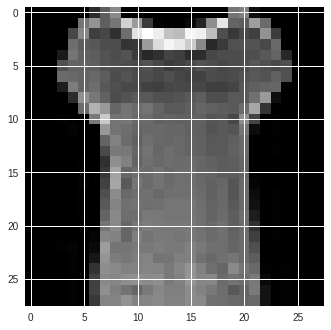

In [9]:
imgplot = plt.imshow(np.array(train_data[100]).reshape((28,28)), cmap = 'gray')

Since the image looks correct the assumption was correct.

Each image is of the format (28, 28, 1)

Plotting the training labels to check how many images of each type there are.

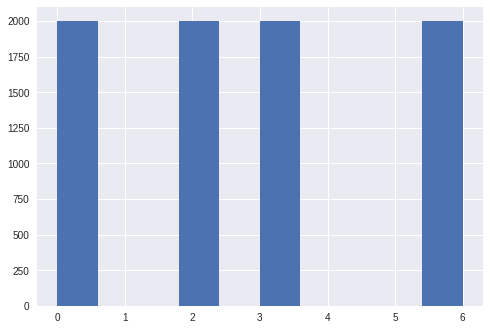

In [10]:
plt.hist(train_labels)
plt.show()

The plot shows that there are 4 classes.

Further we have 2000 images for each of the classes.

There is no skewed distribution so no need for any work there as all classes are equally represented.

Converting all inputs into numpy arrays for simpler usage

In [11]:
train_data = np.array(train_data, dtype = 'float64').reshape(-1,28,28)
test_data = np.array(test_data, dtype = 'float64').reshape(-1,28,28)
train_labels = np.array(train_labels)

print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)

(8000, 28, 28, 1)
(2000, 28, 28, 1)
(8000,)


Since the images are in grayscale this code will convert (28,28,1) image into (28,28,3) for input into models which expect RGB input if required.

In [0]:
train_data = np.stack((train_data,) * 3, axis=-1)
test_data  = np.stack((test_data,) * 3, axis=-1)

print(train_data.shape)
print(test_data.shape)

(8000, 28, 28, 3)
(2000, 28, 28, 3)


## Making train and test images directory
This will make data augmentation easier and saves the images in .jpg format for easy access later.

Making train and test dir

In [0]:
train_path = path/'train'
test_path = path/'test'

train_path.mkdir()
test_path.mkdir()

In [0]:
!rm -rf 'data/train'
!rm -rf 'data/test'

Storing images in np array into files and creating train and test set in given path

In [0]:
df_train = pd.DataFrame(columns=['name', 'label'])
paths = []

for i in range(0, train_data.shape[0]):
  im = str(train_path/('img'+str(i)+'.jpg'))
  plt.imsave(im, train_data[i].reshape((28,28)))
  paths.append(im)

df_train['name'] = paths
df_train['label'] = train_labels
  
for i in range(0, test_data.shape[0]):
  plt.imsave(str(test_path/('img'+str(i)+'.jpg')), test_data[i].reshape((28,28)))

Creating a pandas DataFrame for the training set for use later

In [17]:
print(df_train)

                        name  label
0        data/train/img0.jpg      0
1        data/train/img1.jpg      0
2        data/train/img2.jpg      0
3        data/train/img3.jpg      0
4        data/train/img4.jpg      0
5        data/train/img5.jpg      0
6        data/train/img6.jpg      0
7        data/train/img7.jpg      0
8        data/train/img8.jpg      0
9        data/train/img9.jpg      0
10      data/train/img10.jpg      0
11      data/train/img11.jpg      0
12      data/train/img12.jpg      0
13      data/train/img13.jpg      0
14      data/train/img14.jpg      0
15      data/train/img15.jpg      0
16      data/train/img16.jpg      0
17      data/train/img17.jpg      0
18      data/train/img18.jpg      0
19      data/train/img19.jpg      0
20      data/train/img20.jpg      0
21      data/train/img21.jpg      0
22      data/train/img22.jpg      0
23      data/train/img23.jpg      0
24      data/train/img24.jpg      0
25      data/train/img25.jpg      0
26      data/train/img26.jpg

Visualizing train label distribution

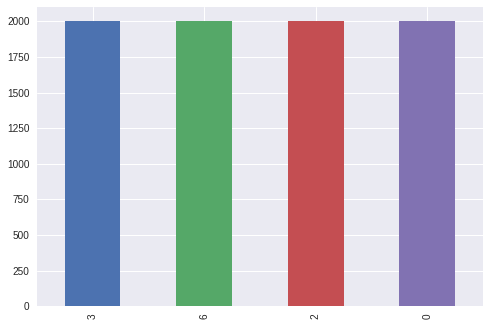

In [18]:
df_train['label'].value_counts().plot('bar')

Visualizing the Images using the FastAI library 

In [0]:
data = ImageDataBunch.from_df("", df_train, ds_tfms=get_transforms(),bs = 64, size=28, valid_pct = 0.2).normalize(imagenet_stats)

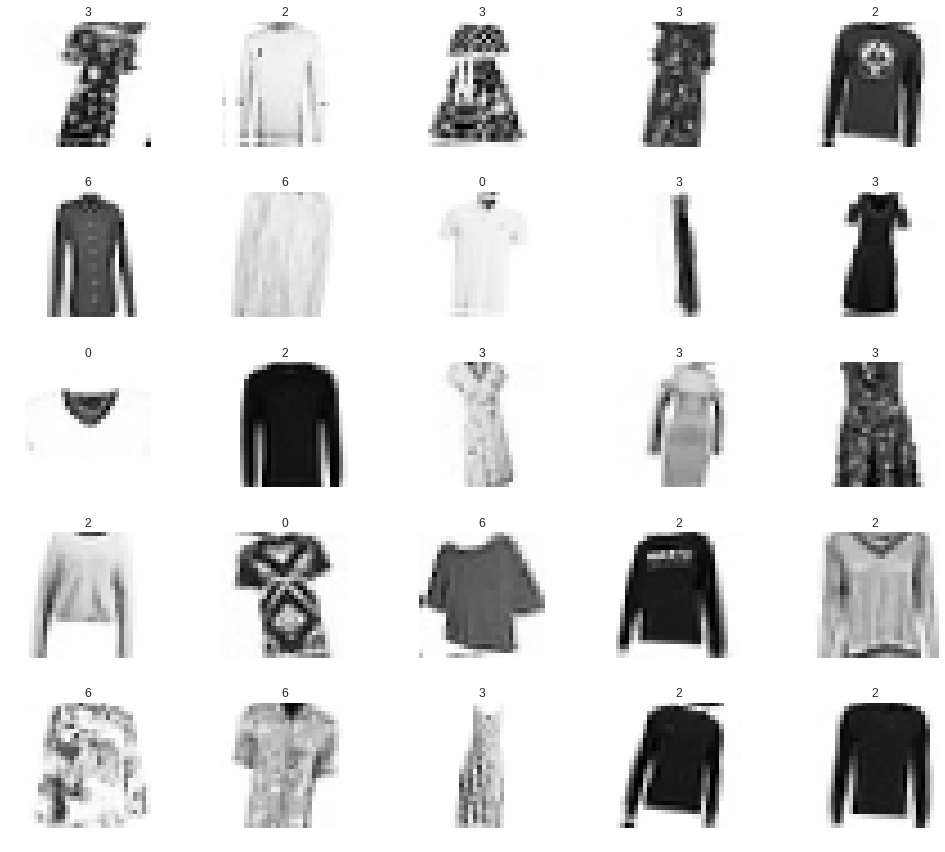

In [21]:
data.show_batch(rows=5, figsize=(14,12))

From observing the images we can see the different classes present

- 0 : T-shirt
- 2: Full-sleeve / pullover
- 3: Dress
- 6: Shirt

#Prototype model

Making a small model in keras to rapidly train and see the various features of the dataset.
Based on the results we can proceed to more complex models as well as see what errors we are making.

## Training the model

The model is a simplified verion of the **VGG - 16** model and was chosen because it isn't too large and can be quickly trained and we can see results faster

There are multiple dropout layers used to reduce overfitting.

In [0]:
input_shape = (28, 28, 1)
classes = 4

model = Sequential()

# first CONV => RELU => CONV => RELU => POOL layer set
model.add(Conv2D(32, (3, 3), padding="same", input_shape=input_shape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# second CONV => RELU => CONV => RELU => POOL layer set
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# third CONV => RELU => CONV => RELU => POOL layer set
model.add(Conv2D(128, (5, 5), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(128, (5, 5), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# first (and only) set of FC => RELU layers
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# softmax classifier
model.add(Dense(classes))
model.add(Activation("softmax"))

Normalizing the data for better results

In [0]:
labels = [0, 2, 3, 6]

train_data = train_data / 255.0
test_data = test_data / 255.0

Converting labels to one-hot encoded categorical values

In [26]:
train_labels = np_utils.to_categorical(train_labels)
train_labels = train_labels[:, labels]

print(train_labels.shape)
print(train_labels)

(8000, 4)
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


Compiling and fitting the model

Here we have used SGD(stochastic gradient descent) with momentum as an optimizer because it tends to work well in this case.

The model has a 0.2 validation split so
- 6400 images for training
- 1600 for validation

The model is trained for 50 epochs

In [27]:
lr = 1e-2
sgd_opt = SGD(lr=lr, momentum=0.9, decay=lr / 30)
model.compile(loss="categorical_crossentropy", optimizer=sgd_opt, metrics=["accuracy"])

history = model.fit(train_data, train_labels, validation_split=0.2, batch_size=64, epochs = 50)

Instructions for updating:
Use tf.cast instead.
Train on 6400 samples, validate on 1600 samples
Epoch 1/50
6400/6400 [==============================] - 6s 963us/step - loss: 0.7157 - acc: 0.7842 - val_loss: 3.7621 - val_acc: 0.0000e+00
Epoch 2/50
6400/6400 [==============================] - 3s 505us/step - loss: 0.4687 - acc: 0.8545 - val_loss: 2.0438 - val_acc: 0.0319
Epoch 3/50
6400/6400 [==============================] - 3s 498us/step - loss: 0.4187 - acc: 0.8641 - val_loss: 2.2946 - val_acc: 0.0150
Epoch 4/50
6400/6400 [==============================] - 3s 498us/step - loss: 0.3772 - acc: 0.8809 - val_loss: 1.5982 - val_acc: 0.2031
Epoch 5/50
6400/6400 [==============================] - 3s 499us/step - loss: 0.3473 - acc: 0.8808 - val_loss: 2.0251 - val_acc: 0.1994
Epoch 6/50
6400/6400 [==============================] - 3s 506us/step - loss: 0.3198 - acc: 0.8909 - val_loss: 1.7021 - val_acc: 0.3719
Epoch 7/50
6400/6400 [==============================] - 3s 501us/step - loss: 0.3079

This model got around 60% accuracy on val set while the training acc is high showing that it is overfitting.
Also the model is not capturing the features of the data very well.

So we can try making a more complex model.

Another main reason for the low performance is the lack of data which was available.
We only had 8k images while many such systems require around 50k images for good resluts.

**To counter this problem we will use the foll:**
- Data Augmentation - will increase the size of train set
- Transfer learning - Using pre-trained imagenet weights will improve accuracy significanty.

Plotting the variation of the accuracy and loss of training and test data for the prev model

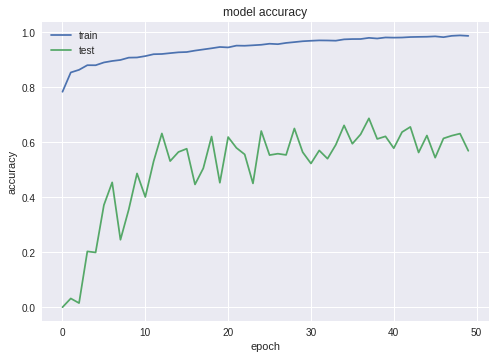

In [28]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

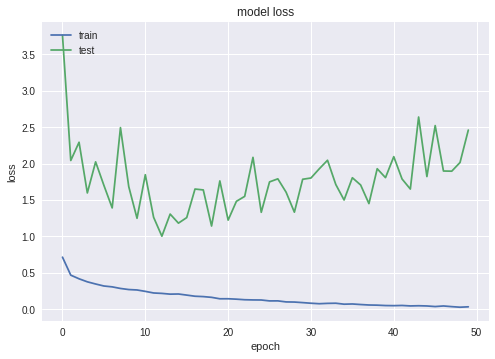

In [29]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Resnet 34 model

We will implement a resnet 34 model using the fastai library.

This model will included weights which have been pre-trained on the imagenet dataset.
Also data augmentation will be done to improve the amount of training data we have.

Data augmentation techniques like flips, skew zoom etc will be automatically applied.

Fetching the resnet34 model. This will automatically download the weights as well if required.
We will be using accuracy as the metric

In [30]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:03, 27937090.94it/s]


We will be fitting the model through 4 cycles.

** One cycle learning is a new method of learning which has been recently found to be much more effective than normally training an epoch**

Paper: https://arxiv.org/abs/1803.09820

In this method the epoch is completed in two phases where first the learning rate is gradually increased to max and then decreased to min.

We are first training the model as much as we can and then we will fine-tune later.

The learning rate which was chosen was decided using the lr finder below

Displaying the model used

In [69]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

** Right now all the bottom layers of the model have been frozen and only the top few layers are trainable. This allows us to apply transfer learning easily**

When we wish to fine-tune we will unfreeze those layers

##Training

In [31]:
learn.fit_one_cycle(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.000842,0.751987,0.726250,00:17
1,0.736519,0.516143,0.790625,00:15
2,0.612095,0.498517,0.799375,00:16
3,0.540782,0.459077,0.824375,00:15


Plotting the train and val losses

The graph shows that the loss is decreasing quite well but there is scope for fine-tuning

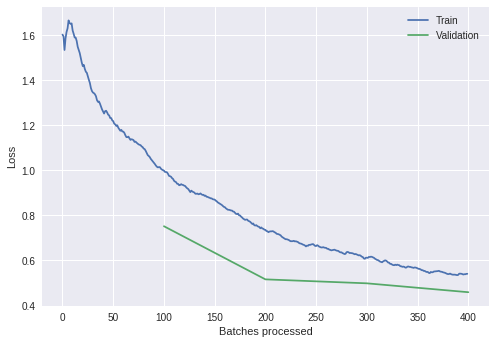

In [32]:
learn.recorder.plot_losses()

Saving the model/weights for future use

In [0]:
learn.save('stage-1')

Using the code to plot learning rates(lr) and their corresponding losses so that we can find the optimal lr.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


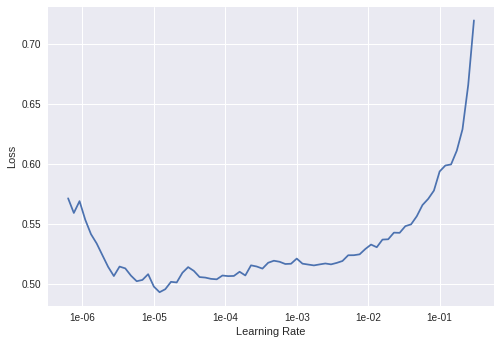

In [34]:
learn.lr_find()
learn.recorder.plot()

The lr is stable around 1e-2 and looks good so we will choose this.

**Unfreezing all the layers so that we can train them**

Also since the bottom layers are already good enough we will set their lr very low as we don't want to change them much and will gradually increase lr as we go up.

In [0]:
learn.unfreeze()

Again finding lr range

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


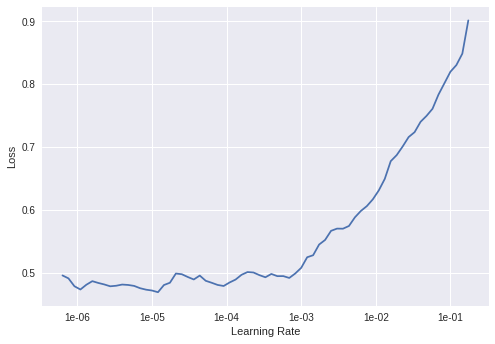

In [36]:
learn.lr_find()
learn.recorder.plot()

The range of 1e-5 to around 1e-3 looks stable so we will distribute these values among the layers of the cnn so that bottom layers change the least.

Therefore the lr of the n/w will look like-

- 1st layer - 1e-5
- Last layer - 3e-4

In [37]:
learn.fit_one_cycle(12, max_lr=slice(1e-5,3e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.516469,0.452302,0.828750,00:17
1,0.513104,0.446859,0.836250,00:17
2,0.508210,0.426493,0.836875,00:17
3,0.486170,0.418089,0.839375,00:17
4,0.480601,0.405678,0.849375,00:17
5,0.453262,0.399862,0.847500,00:17
6,0.444461,0.417532,0.847500,00:16
7,0.414005,0.399575,0.848750,00:17
8,0.400473,0.404889,0.850000,00:16
9,0.381214,0.394372,0.855625,00:16


We got an good accuracy of around 85% on our val set which is quite good given the less amount of images.

Saving model again.

In [0]:
learn.save('stage-2')

##Plotting model statistics

We see the loss is decreasing quite well and the accuracy is stabilizing around 85%

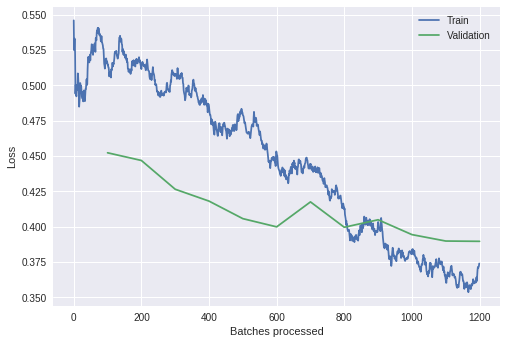

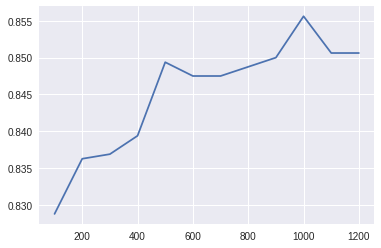

In [39]:
learn.recorder.plot_losses()
learn.recorder.plot_metrics()

The below code will see how the model is making its predictions and what are the top mistakes it is making

**The below function will display the images where the model performed the worst so we can analyze why this happened.**

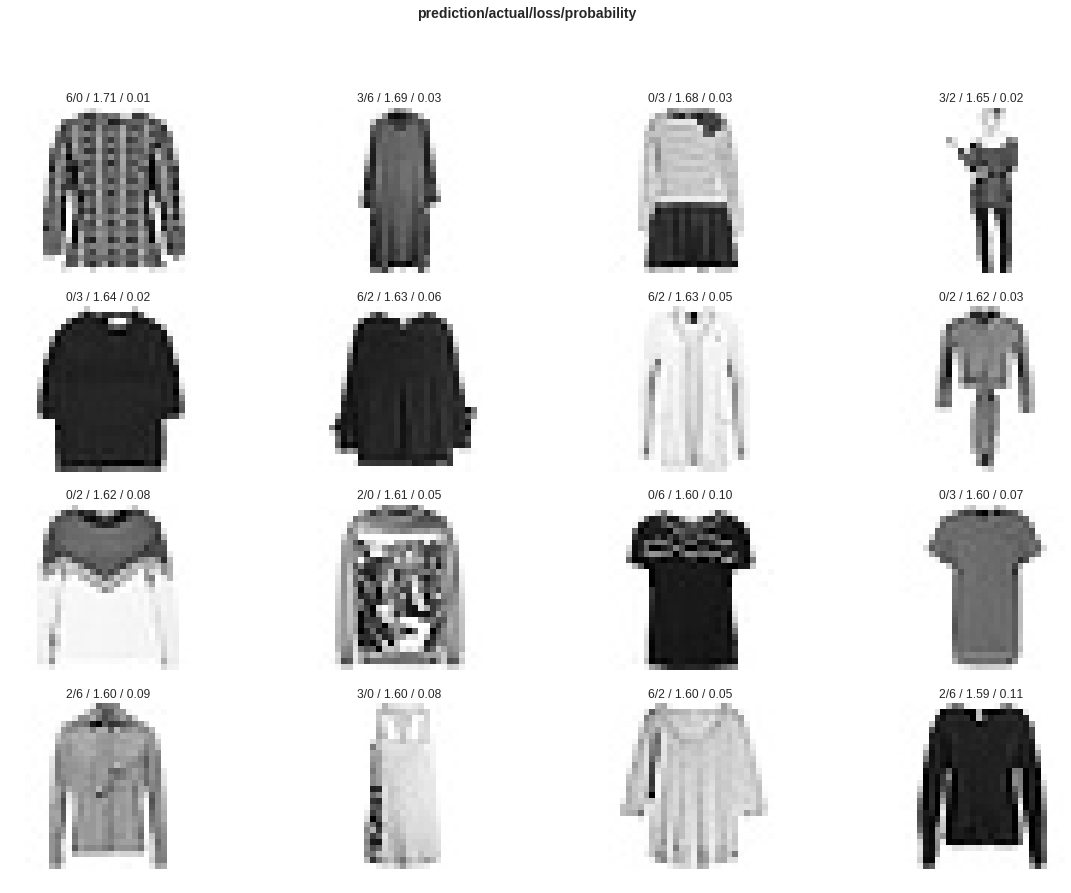

In [40]:
interp = ClassificationInterpretation.from_learner(learn,tta=True)
interp.plot_top_losses(16, figsize=(20,14))

We see the images which have the maximum loss in our val set.

One of the main errors I've noticed is 6/2 or 2/6 which means the model is getting confused between the pullovers and shirts which is understandable considering they look similar.
Another is 0/6 t-shirt and shirt

The other errors are similar

Plotting confusion matrix

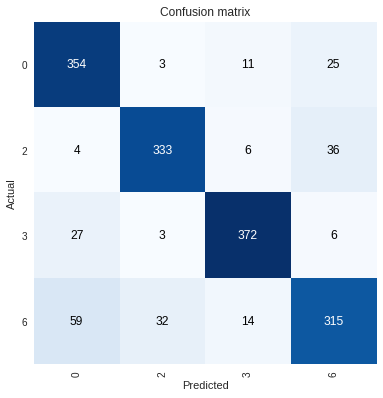

In [41]:
interp.plot_confusion_matrix()

The main area where the model is tripping up is b/w classes 0 and 6.
This is because they are quite similar.

Still the model is getting the majority correct.

Just showing how the model does on the data with ground truth and matching predictions

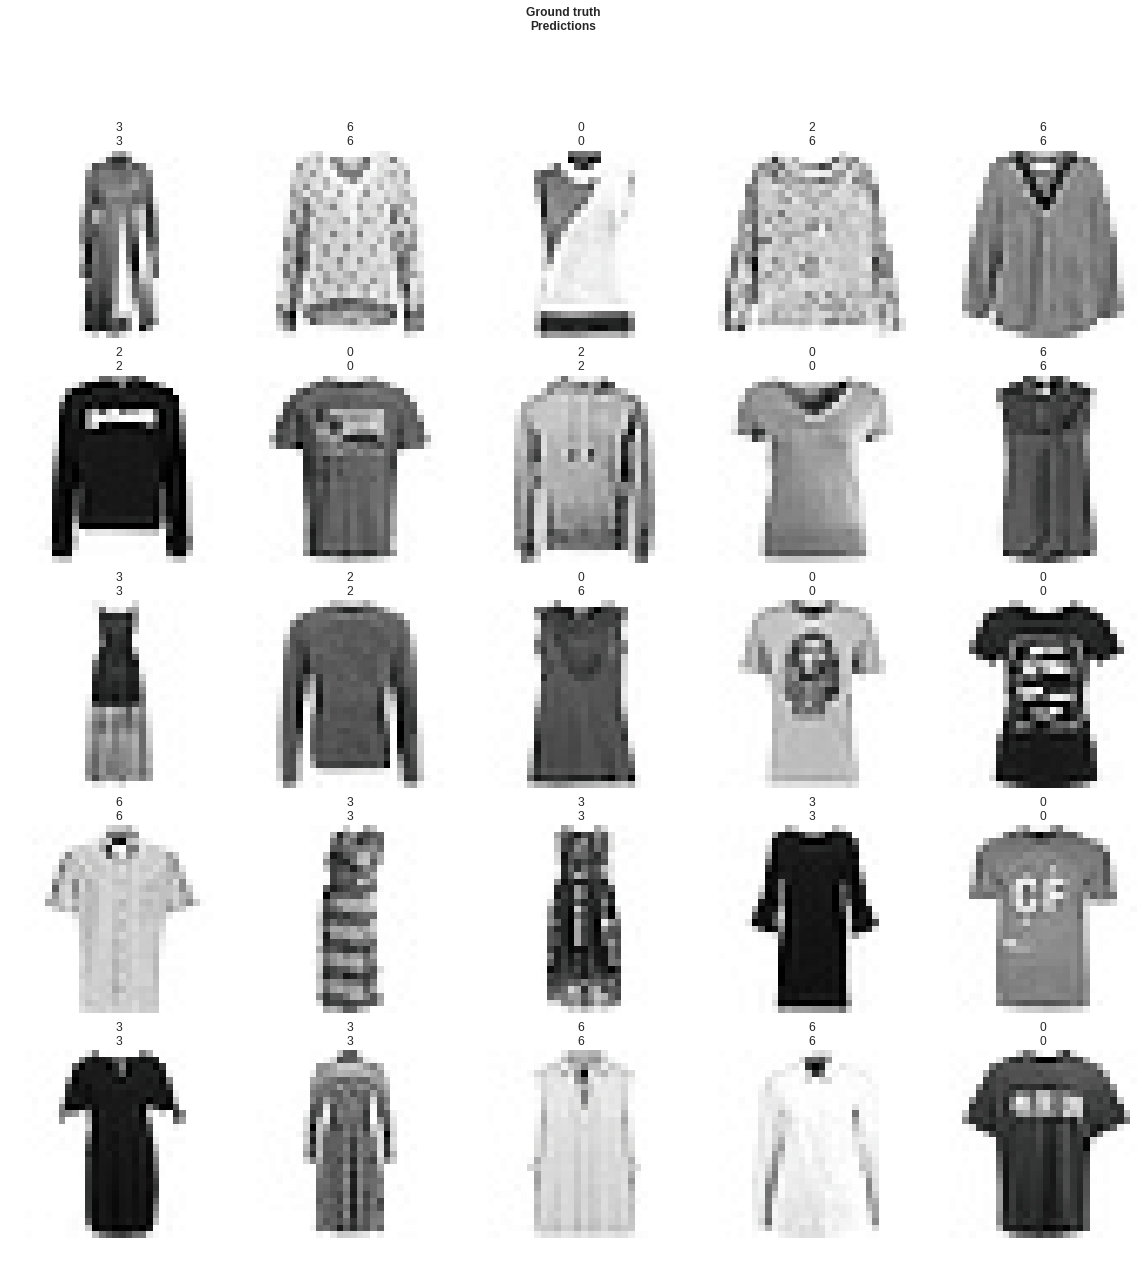

In [42]:
learn.show_results()

In [0]:
classes = data.classes

Saving the model in a pickle file for later use

In [0]:
learn.export()

##Generating results


Opening image from test set and getting a prediction

In [82]:
img = open_image(test_path/'img500.jpg')
img

In [46]:
pred_class,pred_idx,outputs = learn.predict(img)
print(classes[np.argmax(outputs)])

2


The image opened is a pullover so the prediction was correct.

Now generating the predictions

In [47]:
df_test = pd.DataFrame(columns=['image_index', 'class'])
index = []
output = []

for i in range(0, len(test_data)):
  im = test_path/('img'+str(i)+'.jpg')
  img = open_image(im)
  pred_class,pred_idx,outputs = learn.predict(img)
  index.append(i)
  output.append(classes[np.argmax(outputs)])
  
df_test['image_index'] = index
df_test['class'] = output
print(df_test)

      image_index  class
0               0      0
1               1      6
2               2      0
3               3      0
4               4      0
5               5      0
6               6      0
7               7      0
8               8      0
9               9      0
10             10      0
11             11      0
12             12      0
13             13      0
14             14      0
15             15      0
16             16      0
17             17      6
18             18      0
19             19      0
20             20      0
21             21      0
22             22      0
23             23      6
24             24      6
25             25      0
26             26      0
27             27      0
28             28      0
29             29      0
...           ...    ...
1970         1970      6
1971         1971      6
1972         1972      6
1973         1973      0
1974         1974      0
1975         1975      6
1976         1976      6
1977         1977      6


Storing the predictions in a CSV file

In [0]:
df_test.to_csv("output.csv", index = False)

#Resnet 50 Model

The fastai library has allowed us to rapidly prototype the model using a ResNet 34 architecture. We got a decent score of around 85% on our validation set using this method. But we can still try for a better result.

I feel a more comlex model like the resnet 50 will give a better score

The resnet 50 architecture is given below

In [84]:
learn2.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64, 256, kernel_s

## Training

We will repeat the exact same proceedure as above here

In [55]:
learn2 = cnn_learner(data, models.resnet50, metrics=accuracy)
learn2.fit_one_cycle(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.026590,0.780736,0.701250,00:23
1,0.733550,0.605337,0.768125,00:17
2,0.630626,0.456211,0.826875,00:17
3,0.546445,0.447285,0.822500,00:17


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


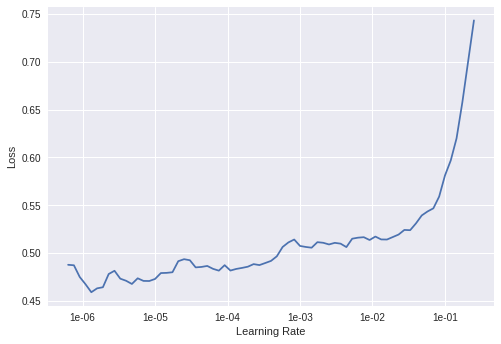

In [56]:
learn2.lr_find()
learn2.recorder.plot()

Unfreezing the model to fine tune

In [0]:
learn2.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


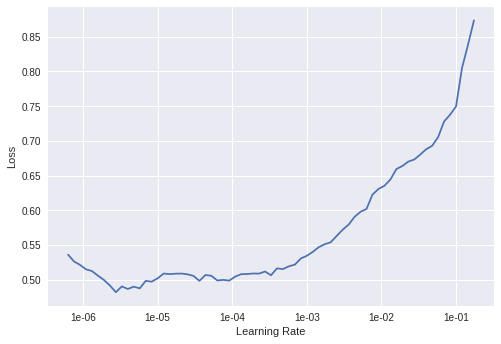

In [58]:
learn2.lr_find()
learn2.recorder.plot()

In [59]:
learn2.fit_one_cycle(12, max_lr=slice(1e-5,3e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.495635,0.458924,0.815625,00:19
1,0.495691,0.424264,0.828750,00:18
2,0.478878,0.437351,0.823125,00:18
3,0.465354,0.400008,0.844375,00:18
4,0.444864,0.360496,0.861875,00:18
5,0.428166,0.400814,0.837500,00:18
6,0.395799,0.364386,0.863750,00:18
7,0.365956,0.366243,0.867500,00:18
8,0.350896,0.363113,0.862500,00:18
9,0.340036,0.348739,0.868125,00:18


We got a score of 86.8% (nearly 87%) this time which is better than the previous model.
The Resnet50 architecture is better at capturing the features of this dataset.

## Plotting model statistics

Plotting the loss with time we see a good decrease and the validation loss has stabilized so this is the best accuacy we can get with this data and this model.

Also the accuracy has stabilized near 87%

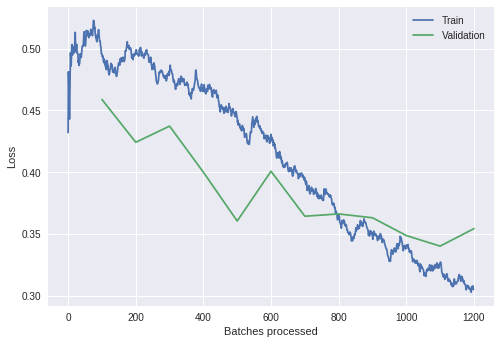

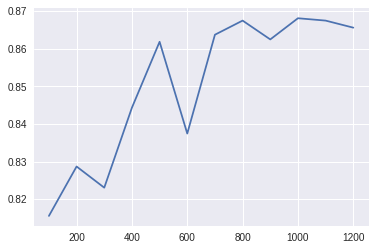

In [60]:
learn2.recorder.plot_losses()
learn2.recorder.plot_metrics()

Saving final model

In [0]:
learn2.save('stage-res50')

We again see the images with maximum loss as well as the confusion matrix

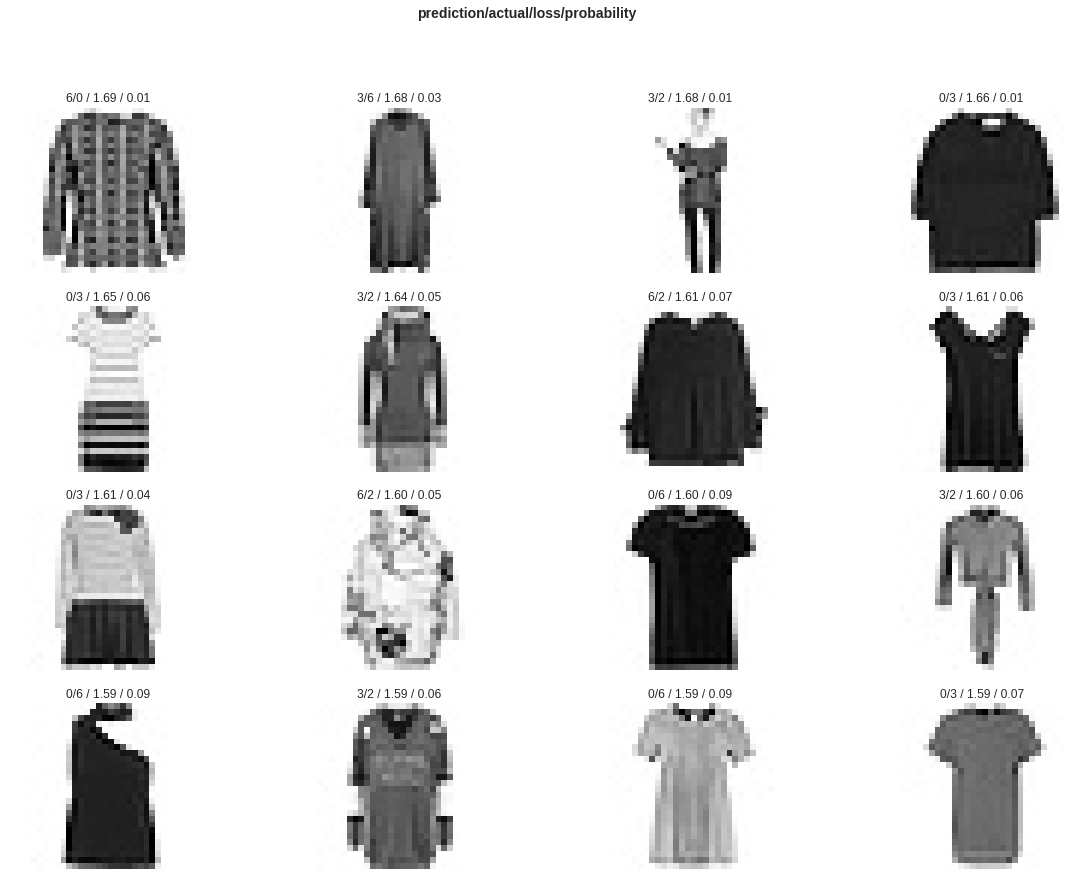

In [62]:
interp = ClassificationInterpretation.from_learner(learn2,tta=True)
interp.plot_top_losses(16, figsize=(20,14))

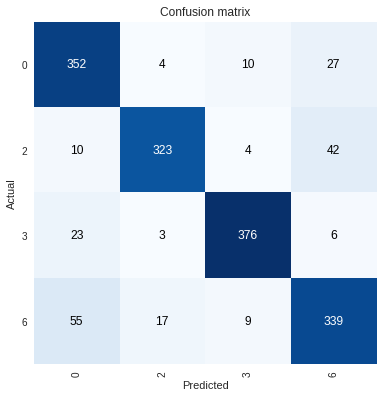

In [63]:
interp.plot_confusion_matrix()

The misclassifications have decreased a bit but the model still is finding 0/6 and 2/6 quite difficult as they are even difficult for humans to properly distinguish.

Exporting final model as export.pkl

In [0]:
learn2.export()

## Generating results

Generating the output .csv file

In [65]:
df_test = pd.DataFrame(columns=['image_index', 'class'])
index = []
output = []

for i in range(0, len(test_data)):
  im = test_path/('img'+str(i)+'.jpg')
  img = open_image(im)
  pred_class,pred_idx,outputs = learn.predict(img)
  index.append(i)
  output.append(classes[np.argmax(outputs)])
  
df_test['image_index'] = index
df_test['class'] = output
print(df_test)

df_test.to_csv("mayank_gupta.csv", index = False)

      image_index  class
0               0      0
1               1      0
2               2      0
3               3      0
4               4      0
5               5      0
6               6      0
7               7      0
8               8      0
9               9      0
10             10      0
11             11      0
12             12      6
13             13      0
14             14      0
15             15      6
16             16      0
17             17      0
18             18      0
19             19      0
20             20      0
21             21      0
22             22      0
23             23      0
24             24      0
25             25      0
26             26      0
27             27      0
28             28      0
29             29      0
...           ...    ...
1970         1970      0
1971         1971      0
1972         1972      6
1973         1973      0
1974         1974      0
1975         1975      0
1976         1976      6
1977         1977      0


# Final results
 
- The model we used finally was the Resnet50 architecture
- Data Augmentation was applied to generate more training data
- The model used transfer learning (pre-trained imagenet weights) using the FastAI library
- One cycle learning was used for faster and better results
- Our final validation accuracy was 86.8%